# 9.3 Opening and Closing a File

Now for the meat of this module.  In this lesson we're going to learn:

- How to open a file.
- The importance of closing a file properly.
- Two approaches to handling openning and closing files.
- Different options when openning a file.

## Outline

- use the `open()` built-in to open a file
    - returns a File Handler
        - A special object that allows for: open, close, read, write
    - Make sure to always close your open files!
    - Invalid file paths will raise a `FileNotFoundError`
    - checking to see if a file exists 
- There are two approaches to closing a file:
    - `<handler>.close()`
    - Context manager using `with` (preferred method)
- `open` function:
    - file path
    - file mode `'r'`, `'w'`, `'rb'`, or `'wb'`


<div class="alert alert-warning">
Blah blah blah
</div>

## How to Open a File

In order to open a file within Python, you'll use the `open()` builtin function.  The `open` function returns a file handler instead of the actual file.  The file handler is what is used to interact with the file giving the user access to 4 basics functions:

1. Open
2. Read
3. Write
4. Close

In [1]:
import pathlib

path = pathlib.Path.cwd() / 'darth_plagueis_tragedy.txt'
fh = open(path)
print(fh)

<_io.TextIOWrapper name='/Users/mertz/Documents/Repos/pcc-cis-012-intro-to-programming-python/Lecture Material/9_File_IO/darth_plagueis_tragedy.txt' mode='r' encoding='UTF-8'>


<div class="panel panel-warning">
    <div class="panel-heading"><b>Warning!</b></div>
    <div class="panel-body">
        <p>You should <b>always</b> make sure to properly close your files.  Failure to do so may cause issues during operation of your Python program.</p>
    </div>
</div>

### Checking if a File Exists

In [2]:
path = pathlib.Path.cwd() / 'some_junk_file.junkext'
fh = open(path)
print(fh)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mertz/Documents/Repos/pcc-cis-012-intro-to-programming-python/Lecture Material/9_File_IO/some_junk_file.junkext'

Use what we learned about `pathlib` to make sure that the file can be opened and then open it.

In [3]:
if path.exists():
    fh = open(path)
else:
    print(f'{path} does not exist!')

/Users/mertz/Documents/Repos/pcc-cis-012-intro-to-programming-python/Lecture Material/9_File_IO/some_junk_file.junkext does not exist!


## Properly Ensuring File Closure

There are two ways to close a file:

1. Manually using the `.close()` method.
2. Using the `with` statement (preferred).

### Ensured Closure Using `try`/`finally`

In [8]:
path = pathlib.Path.cwd() / 'darth_plagueis_tragedy.txt'
fh = open(path)
try:
    print(fh)
finally:  # No matter what happens even if an exception occurs, this will be ran
    fh.close()

<_io.TextIOWrapper name='/Users/mertz/Documents/Repos/pcc-cis-012-intro-to-programming-python/Lecture Material/9_File_IO/darth_plagueis_tragedy.txt' mode='r' encoding='UTF-8'>


Let's examine what happens when something goes wrong here:

In [10]:
def stuff_that_errors(fh):
    raise NotImplementedError()

path = pathlib.Path.cwd() / 'darth_plagueis_tragedy.txt'
fh = open(path)
try:
    stuff_that_errors(fh)
finally:
    print('---------> this still happened <---------')
    fh.close()

---------> this still happened <---------


NotImplementedError: 

Furthermore, since we're using jupyter notebooks and the Python program that's executing here is still running, we can check to see if the file is still opened.

In [12]:
fh.closed

True

### Ensured Closure Using the `with` Statement

Using the `with` statement will automatically take care of the `try`/`except` block for you.  It makes your code cleaner.

In [13]:
path = pathlib.Path.cwd() / 'darth_plagueis_tragedy.txt'
with open(path) as fh:
    print(fh)

<_io.TextIOWrapper name='/Users/mertz/Documents/Repos/pcc-cis-012-intro-to-programming-python/Lecture Material/9_File_IO/darth_plagueis_tragedy.txt' mode='r' encoding='UTF-8'>


In [14]:
print(fh.closed)

True


## The `open` Function Parameter

The first parameter for the `open()` function is the file path.  We use the `pathlib` path for this, but it can be just a string as well.  There is a second positional argument that is used to assign file access.

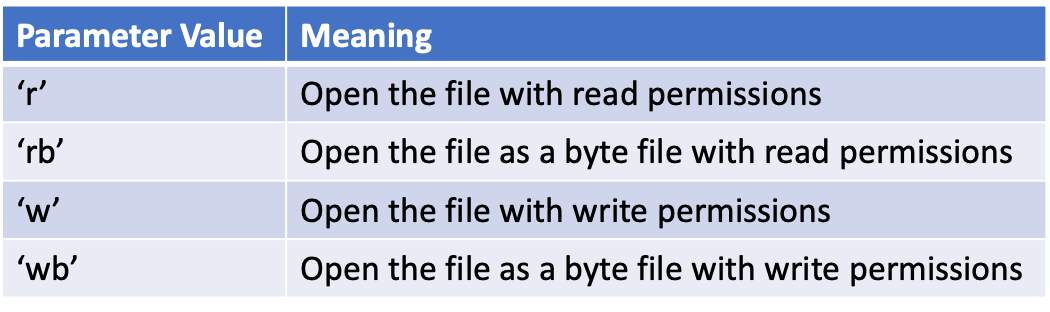

<div class="alert alert-info">
    <b>Note:</b> by default <code>'w'</code> is the default permissons.
</div>

In [16]:
path = pathlib.Path('darth_plagueis_tragedy.txt')
with open(path, 'w') as fh:
    print(fh)

<_io.TextIOWrapper name='darth_plagueis_tragedy.txt' mode='w' encoding='UTF-8'>


In [17]:
with open('darth_plagueis_tragedy.txt', 'rb') as fh:
    print(fh)

<_io.BufferedReader name='darth_plagueis_tragedy.txt'>
